## Importing Required Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV



## Importing Dataset

In [2]:
# Define column headers
column_headers = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

In [3]:
data = pd.read_csv(r"C:\Users\dhyey\OneDrive - Humber Polytechnic\Desktop\DATA\GitHub\Adult_Income_PRediction\adult.data", 
                   header=None, names=column_headers)
test = pd.read_csv(r"C:\Users\dhyey\OneDrive - Humber Polytechnic\Desktop\DATA\GitHub\Adult_Income_PRediction\adult_test", header=None, names=column_headers)


## Feature Engineering 

In [4]:
# Display the first few rows
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Replace '?' with NaN
data.replace(r'^\s*\?\s*$', np.nan, regex=True, inplace=True)
test.replace(r'^\s*\?\s*$', np.nan, regex=True, inplace=True)


In [6]:
# Drop missing values
data = data.dropna()
test.dropna(inplace=True)


In [7]:
# Drop duplicates
data = data.drop_duplicates()
test = test.drop_duplicates()

In [8]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex', 'native-country', 'income']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.fit_transform(test[col])

In [9]:
data.count()

age               30139
workclass         30139
fnlwgt            30139
education         30139
education-num     30139
marital-status    30139
occupation        30139
relationship      30139
race              30139
sex               30139
capital-gain      30139
capital-loss      30139
hours-per-week    30139
native-country    30139
income            30139
dtype: int64

In [10]:
# Display the first few rows after encoding
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [11]:
data.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,30139.000000,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,2.199409,1.897950e+05,10.333057,10.122532,2.579714,5.960317,1.418494,3.678523,0.675736,1092.841202,88.439928,40.934703,36.384784,0.249046
std,13.131426,0.954217,1.056586e+05,3.812057,2.548738,1.498082,4.030067,1.601630,0.834786,0.468107,7409.110596,404.445239,11.978753,6.102941,0.432468
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176275e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784170e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376045e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


## Exploratary Data Analysis

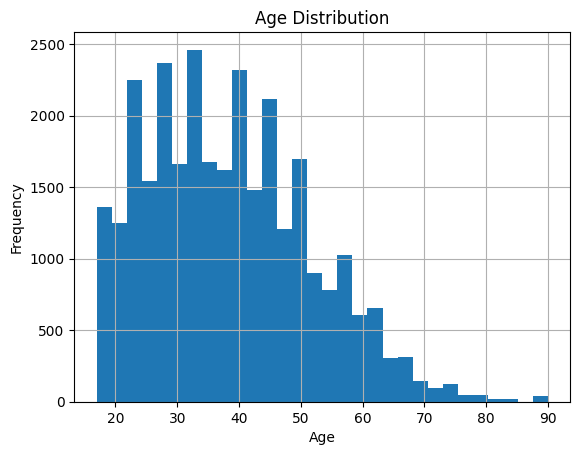

In [12]:
data['age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

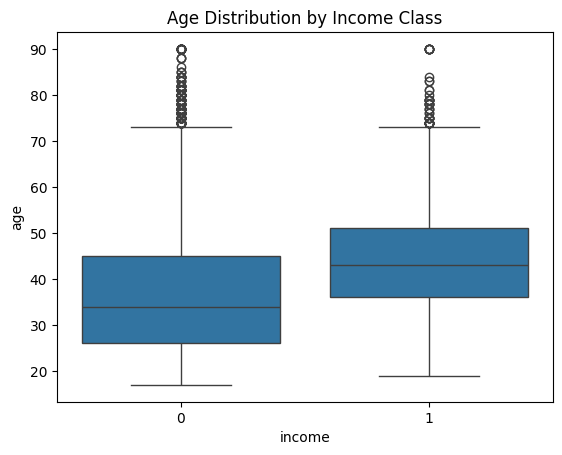

In [13]:
sns.boxplot(x='income', y='age', data=data)
plt.title('Age Distribution by Income Class')
plt.show()

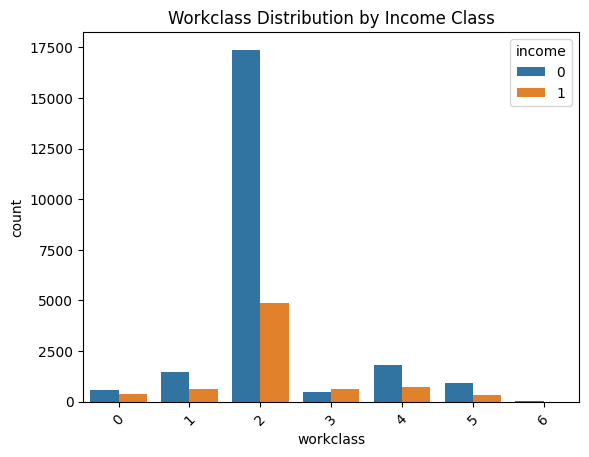

In [14]:
sns.countplot(x='workclass', hue='income', data=data)
plt.title('Workclass Distribution by Income Class')
plt.xticks(rotation=45)
plt.show()


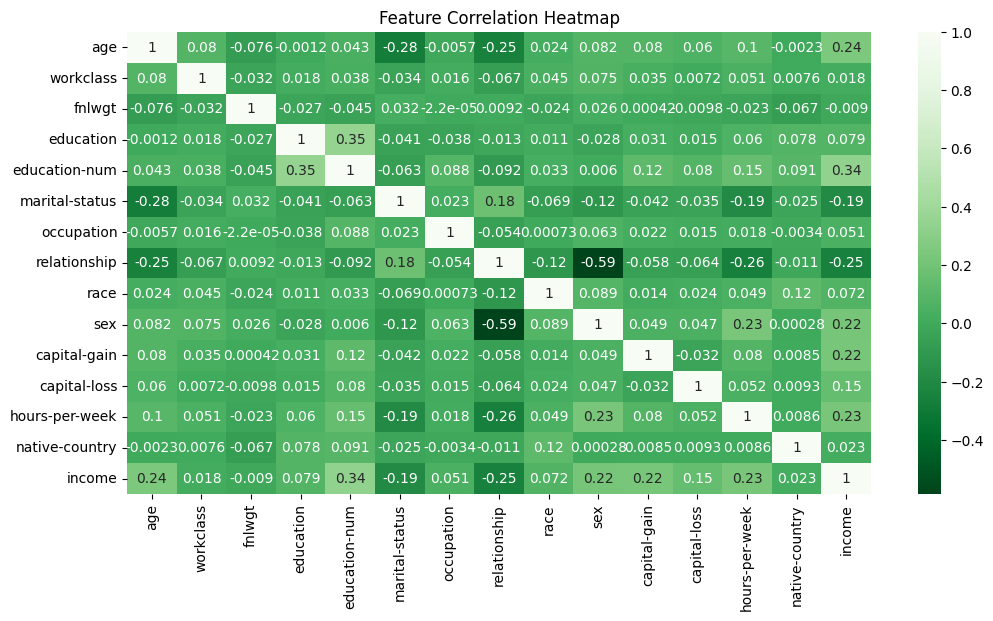

In [15]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), cmap='Greens_r', annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

## Preparing Data For Training Models

In [16]:
# Features and target
X_train = data.drop(columns=['income'])
y_train = data['income']
X_test = test.drop(columns=['income'])
y_test = test['income']

## Model Training And Evaluation

### Logistic Regression: 
###    A simple and interpretable model used for binary classification. It calculates the probability of a data point belonging to a class using the logistic function.

In [17]:

# Scale the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the Logistic Regression model on scaled data
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [18]:
# Evaluate
print("Logistic Regression - F1 Score:", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression - F1 Score: 0.5557196783193828
Confusion Matrix:
 [[10655   700]
 [ 2007  1693]]


### Random Forest: 
###     An ensemble model that builds multiple decision trees and combines them to improve accuracy and prevent overfitting.

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [20]:
# Evaluate
print("Random Forest - F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest - F1 Score: 0.663569608871572
Confusion Matrix:
 [[10596   759]
 [ 1486  2214]]


### XGBoost: 
### An optimized implementation of gradient boosting, focusing on efficiency and speed. It builds trees sequentially, minimizing errors from previous trees.

In [21]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [22]:
# Evaluate
print("XGBoost - F1 Score:", f1_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost - F1 Score: 0.6888004895960832
Confusion Matrix:
 [[10770   585]
 [ 1449  2251]]


### (KNN): 
### A non-parametric algorithm that classifies data based on the majority class of its nearest neighbors.

In [23]:
# Using GridSearchCV to find the best number of neighbors
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']

In [24]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [25]:
# Evaluate
print("KNN - F1 Score:", f1_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN - F1 Score: 0.365570218633051
Confusion Matrix:
 [[10906   449]
 [ 2772   928]]


# Summary
## 1. Logistic Regression
### F1 Score:  0.55
### Analysis: 
####    Logistic Regression has the lowest F1 score among the models. This indicates that it’s less effective at balancing precision and recall, likely because it may struggle with the non-linear relationships in the dataset.


## 2. Random Forest
### F1 Score: 0.66

### Analysis: 
#### The Random Forest model performs significantly better than Logistic Regression. Its ability to handle non-linear patterns and interactions between features results in higher recall and precision, as seen from its improved F1 score and confusion matrix.


## 3. XGBoost
### F1 Score: 0.69

### Analysis: 
#### XGBoost outperforms both Logistic Regression and Random Forest, achieving the highest F1 score. Its effectiveness comes from its ability to capture complex patterns due to boosting, where it builds sequential trees to minimize errors from previous iterations. The confusion matrix shows that it correctly identifies more positive and negative cases compared to the other models.


## 4. K-Nearest Neighbors (KNN)
### F1 Score: 0.37

### Analysis: 
#### KNN performs the worst in terms of the F1 score. Its performance is likely impacted by the high dimensionality and the categorical nature of the dataset, making it less effective as it relies on distance metrics that are not well-suited for this kind of data.



# Conclusion
## Best Performing Model: 
#### XGBoost, with an F1 score of 0.689. It performs the best among the models as it captures complex relationships and has strong generalization abilities.

## Reason: 
#### XGBoost’s boosting technique, which combines multiple weak models to form a strong model, provides an advantage in both precision and recall, making it the most effective option for this dataset.